<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez y Juan Pablo Ruiz Magaña.

**Fecha:** 12 de marzo del 2021.

**Expediente** : 722627,721093.
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link del repositorio**: https://github.com/JuanPablo2019/Tarea8.git
# Tarea 8: Clase 14

## Enunciado de tarea 
# <font color = red> Tarea
**Esta tarea incluye el ejercicio dejado en la clase anterior**
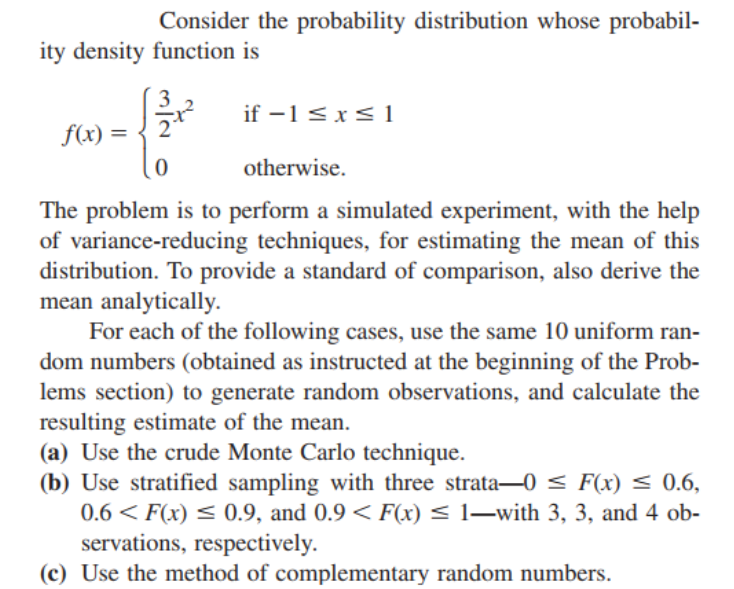
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

### Ejercicio 1: (enunciado)

In [ ]:
# Código de solución 
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Respuestas de Juan Pablo

### Obteniendo la media de forma analitica.

$${I = \int_{-1}^{1} \frac{3}{2} x^{2} dx}$$
Sacando las constantes:
$${I = \frac{3}{2} \int_{-1}^{1} x^{2} dx}$$
Integrando:
$${I = \frac{3}{2} \frac{x^{3}}{3}}$$
Evaluando la integral en sus limites:
$${I = \frac{3}{2} (\frac{1}{3} - \frac{(-1)^{3}}{3})}$$
$${I = \frac{3}{2} (\frac{1}{3} + \frac{1}{3})}$$
$${ I = 1}$$


1. Se importan las liberías.

In [3]:
import numpy as np
import scipy.stats as st     
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Definiendo la función.

In [4]:
def f(x):
    if  -1<=x<=1:
        return (3/2)*x**2
    else:
        return 0
        

3. Genero 10 aleatorios uniformemente distribuidos

In [5]:
a = -1
b = 1
N = 10
u = np.random.uniform(a,b,N)

In [6]:
u

array([-0.16063531,  0.05268012, -0.23098665, -0.41289708, -0.41096635,
       -0.4604211 , -0.2165518 ,  0.91108273, -0.80673812, -0.84882706])

### A) Utilizando el método de montecarlo crudo.

In [7]:
monte_crudo = np.mean(list(map(f,u)))
print('La media estimada por el método de números complementarios es: ',monte_crudo)

La media estimada por el método de números complementarios es:  0.43223982886410683


### B) Utilizando el método de muestreo estratificado.

1. Generar 3 observaciones en el intervalo ${0 \leq F(x) \leq 0.6}$
2. Generar 3 observaciones en el intervalo ${0.6 < F(x) \leq 0.9}$
3. Generar 4 observaciones en el intervalo ${0.9 < F(x) \leq 1}$

In [8]:
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
r = [r1,r2,r3]

4. Definiendo la función de densidad acumulada: $${F(x) = \frac{x^{3}}{2}}$$
Calculando su inversa: $${F(x) = u}$$
$${F^{-1} = {2u}^{\frac{1}{3}}}$$

In [61]:
xi = lambda u: (2*u)**(1/3)
#definiendo los pesos
w = [((3/10)/0.6),((3/10)/0.9),((4/10)/1)]
#generando las muestras
samples = [xi(i) for i in r]
#muestras entre sus pesos
r_w = [ samples[i]/w[i] for i in range(3)]


In [62]:
total = np.concatenate(samples)
print('la media de la muestra es:',np.mean(total))

la media de la muestra es: 1.1197856714831502


### C) Utilizando el método de los números complementarios.

1. Generando los complementarios de los 10 alaeatorios previamente generados.
Recordando que estos se encuentran en un intervalo diferente de [0,1]
Procedo a calcularlos de la siguiente forma:

  ${x_{comp} = b-x+a}$

In [63]:
u2 = b - u + a

2. Concateno ambos vectores.
3. Los evaluo en la función y calculo la media.

In [64]:
u_comp = np.mean(list(map(f,(np.concatenate([u,u2])))))
print('La media estimada por el método de números complementarios es: ',u_comp)

La media estimada por el método de números complementarios es:  0.43223982886410683


Usando el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

In [13]:
def monte_carlo(a,b,f,u):
    
  
    return ((b-a)/len(u))*np.sum(f(u))

In [58]:
def m_estrato(N):
    global a,b
    U = np.random.uniform(a,b,N)
    estratos = np.arange(0,N)
    ans = (U+estratos)/N
    samples = (np.abs(2*(ans)))**(1/3)
    return samples

In [59]:
estratos = [2,4,6,8]
samples2 = [m_estrato(i) for i in estratos]
samples2

[array([0.9069728 , 0.85766455]),
 array([0.77757534, 0.6683772 , 1.04024063, 1.06617807]),
 array([0.44379093, 0.65005303, 0.82352947, 1.06565612, 1.05305877,
        1.24892171]),
 array([0.49563519, 0.69244575, 0.81099861, 0.84390255, 0.94979006,
        1.11244048, 1.11945839, 1.20872315])]

In [60]:
print('la media con 2 estratos es:',samples2[0].mean())
print('la media con 4 estratos es:',samples2[1].mean())
print('la media con 6 estratos es:',samples2[2].mean())
print('la media con 8 estratos es:',samples2[3].mean())

la media con 2 estratos es: 0.882318671402331
la media con 4 estratos es: 0.8880928117711484
la media con 6 estratos es: 0.8808350038796838
la media con 8 estratos es: 0.9041742733484328


### Conclusión:

Podemos observar que el método de muestreo estratificado con estratos igualmente ponderados se apróximo mejor a la media real la cual es igual a 1. Siendo el de 8 estratos el más cercano con una media iguala .9041. Por lo tanto fue el método que logro reducir mejor la varianza.

### Respuestas de Daniel